In [1]:

import pickle
dbfile = open('/home/hadarla/Projects/brainscore-language-fork/brainscore-language/brainscore_language/benchmarks/t17speech2024/gpt2-large-t17speech2024_14Oct2024.pkl', 'rb')
db = pickle.load(dbfile)
for keys in db:
    print(keys, '=>', db[keys])
dbfile.close()

/home/hadarla/miniconda3/envs/brain-score-env/lib/python3.10/site-packages/brainscore_core/metrics/__init__.py:16: FutureWarning: xarray subclass Score should explicitly define __slots__
  class Score(DataAssembly):


model => <brainscore_language.model_helpers.huggingface.HuggingfaceSubject object at 0x7b572c4b5930>
benchmark => <brainscore_language.benchmarks.t17speech2024.benchmark.T17speech2024Linear object at 0x7b565b104400>
layer_scores => <xarray.Score (layer: 36)>
array([0.35055997, 0.35206574, 0.34834208, 0.34731581, 0.34691145,
       0.3457944 , 0.34585849, 0.34639688, 0.3452942 , 0.34513249,
       0.34503301, 0.34550925, 0.35205079, 0.34520188, 0.34572786,
       0.34431709, 0.34519649, 0.3458269 , 0.34616741, 0.34531692,
       0.34125478, 0.34554247, 0.34562651, 0.35202982, 0.34625718,
       0.34566047, 0.34560442, 0.34783027, 0.34926115, 0.35040387,
       0.35158461, 0.35180291, 0.35164594, 0.35115121, 0.35024471,
       0.34873859])
Coordinates:
  * layer    (layer) <U21 'transformer.h.0.ln_1' ... 'transformer.h.9.ln_1'
Attributes:
    raw:      <xarray.Score (layer: 1, split: 10, neuroid: 512)>\narray([[[0....
layer_score => <xarray.Score (layer: 1)>
array([0.35040387])
Coordinat

In [2]:
import numpy as np
electrode_mapping = np.arange(0,512)

In [3]:
from tqdm import tqdm
layer_names = []
for layer in tqdm([f'transformer.h.{block}.ln_1' for block in range(36)], desc='layers'):
    layer_names.append(layer)

print(layer_names)



layers: 100%|█████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 1020236.11it/s]

['transformer.h.0.ln_1', 'transformer.h.1.ln_1', 'transformer.h.2.ln_1', 'transformer.h.3.ln_1', 'transformer.h.4.ln_1', 'transformer.h.5.ln_1', 'transformer.h.6.ln_1', 'transformer.h.7.ln_1', 'transformer.h.8.ln_1', 'transformer.h.9.ln_1', 'transformer.h.10.ln_1', 'transformer.h.11.ln_1', 'transformer.h.12.ln_1', 'transformer.h.13.ln_1', 'transformer.h.14.ln_1', 'transformer.h.15.ln_1', 'transformer.h.16.ln_1', 'transformer.h.17.ln_1', 'transformer.h.18.ln_1', 'transformer.h.19.ln_1', 'transformer.h.20.ln_1', 'transformer.h.21.ln_1', 'transformer.h.22.ln_1', 'transformer.h.23.ln_1', 'transformer.h.24.ln_1', 'transformer.h.25.ln_1', 'transformer.h.26.ln_1', 'transformer.h.27.ln_1', 'transformer.h.28.ln_1', 'transformer.h.29.ln_1', 'transformer.h.30.ln_1', 'transformer.h.31.ln_1', 'transformer.h.32.ln_1', 'transformer.h.33.ln_1', 'transformer.h.34.ln_1', 'transformer.h.35.ln_1']


In [9]:
layer_scores_per_neuroid = []
layer_scores_per_neuroid_reordered = []
for layer_ind in range(36):
    data = db['layer_scores_backup'][layer_ind].raw.mean('split').data
    data = data.reshape(512,1)
    data_reordered = data[electrode_mapping]
    layer_scores_per_neuroid.append(data)
    layer_scores_per_neuroid_reordered.append(data_reordered)
print(np.shape(data))

(512, 1)


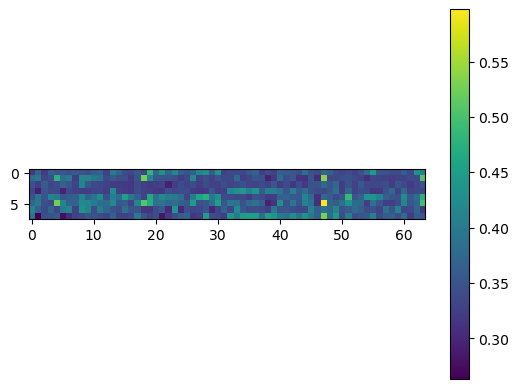

In [6]:
import matplotlib.pyplot as plt
plt.imshow(layer_scores_per_neuroid_reordered[2].reshape(8,64))
plt.colorbar()
plt.show()

In [10]:
import xarray as xr

layer_scores_per_neuroid_reordered_reshaped = []
for layer in range(36):
    arr_all = []
    for array_index in range(4):
        arr = layer_scores_per_neuroid_reordered[layer][array_index*64:(array_index+1)*64]
        arr_all.append(arr.reshape(64,1))
    layer_scores_per_neuroid_reordered_reshaped.append(arr_all)

layer_scores_per_neuroid_reordered_reshaped = np.squeeze(layer_scores_per_neuroid_reordered_reshaped)

array_pos = ["6v-1", "6v-2", "55b-1", "55b-2"]
layer_scores_per_array = xr.DataArray(layer_scores_per_neuroid_reordered_reshaped,
                                      coords = [layer_names, array_pos, range(64)], dims = ["layers", "array", "neuroid"])

means = layer_scores_per_array.mean('neuroid')
stds = layer_scores_per_array.std('neuroid')

# fig, ax = plt.subplots(figsize=(10, 10))
# for array_ind in range(4):
#     plot_score_vs_layer(means[:,array_ind], stds[:,array_ind])
# plt.legend(array_pos)
# plt.show()
#fig.show()

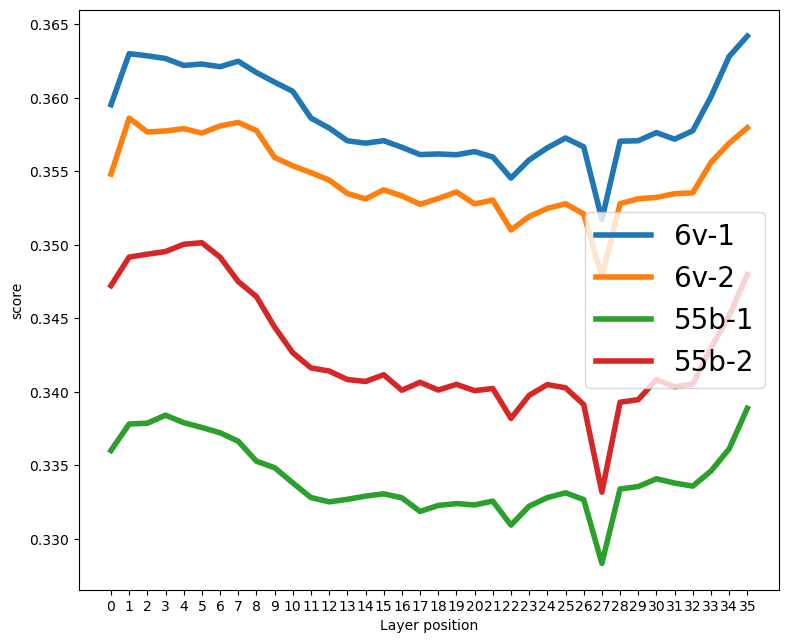

In [11]:


fig, ax = plt.subplots(figsize=(10, 10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

for array_ind in range(4):

    x = np.arange(36)
    ax.plot(x,means[:,array_ind],linewidth=4)
    fig.subplots_adjust(bottom=0.3, left=0.2)
    #ax.set_xticklabels(layer_names, rotation=45, ha='right')
    ax.set_ylabel('score')

x = np.arange(0,36)
plt.xticks(x)
plt.rcParams.update({'font.size': 20})
plt.xlabel('Layer position')

plt.legend(array_pos,loc=7)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_meanLayerScore_allArrays.svg') #, bbox_inches='tight')


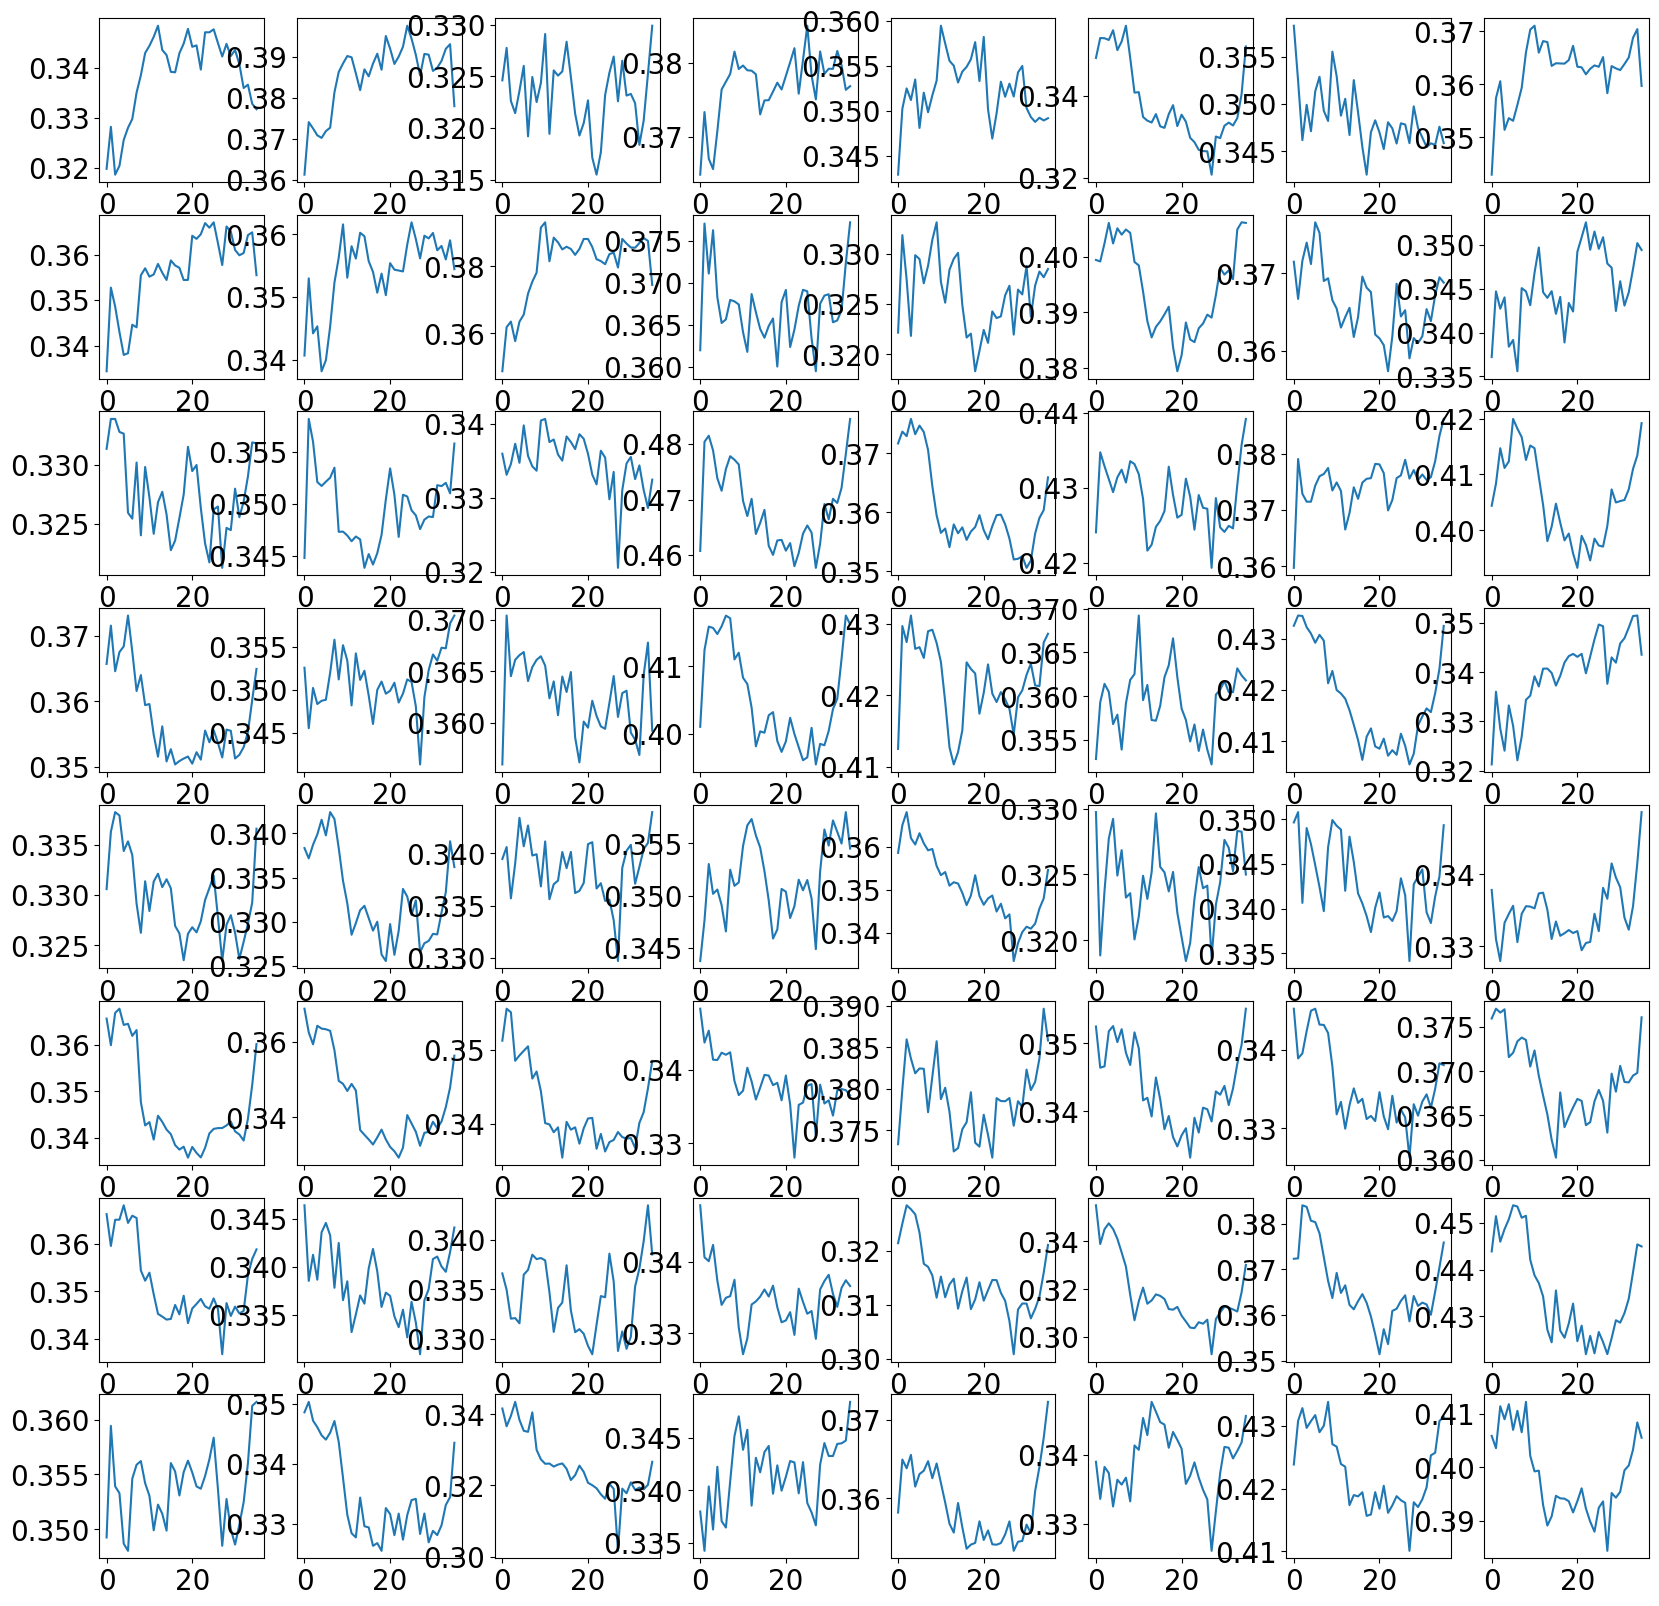

In [12]:
fig, axs = plt.subplots(8,8,figsize=(20, 20))

x = np.arange(36)
for array_ind in range(4):
    for neuroid_ind in range(64):   #= 13
        layer_scores_single_neuroid = []
        #layer_scores_per_neuroid_reordered_reshaped = []
        for layer in range(36):
            neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
            layer_scores_single_neuroid.append(neuroid_score_layer)
    
        subfig_ind = np.unravel_index(neuroid_ind, [8, 8])
        # axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
        axs[subfig_ind].plot(layer_scores_single_neuroid)
        #axs[subfig_ind].tick_params(axis='both', labelsize=10)
    
    
        #plt.plot(layer_scores_single_neuroid)
    
    plt.rcParams.update({'font.size': 14})
    plt.show()



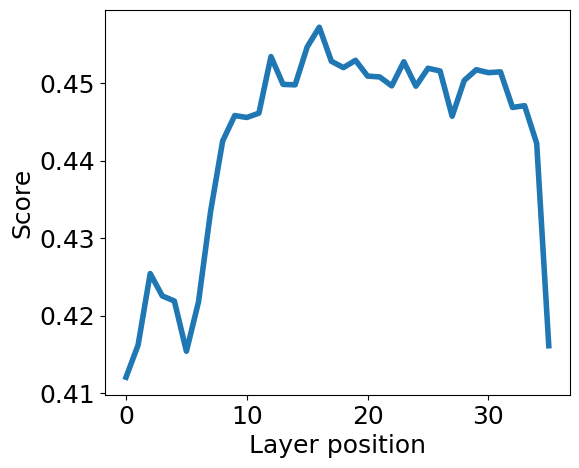

In [14]:
plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1,1,figsize=(6, 5))

array_ind = 3
neuroid_ind = 13
layer_scores_single_neuroid = []
for layer in range(36):
    neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
    layer_scores_single_neuroid.append(neuroid_score_layer)

# axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
plt.plot(layer_scores_single_neuroid,linewidth=4)
#axs[subfig_ind].tick_params(axis='both', labelsize=10)
plt.xlabel('Layer position')
plt.ylabel('Score')

#figure(figsize=(8, 6), dpi=80)

plt.show()

#fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_array55b-2-neuroid13.svg',bbox_inches='tight') #, bbox_inches='tight')


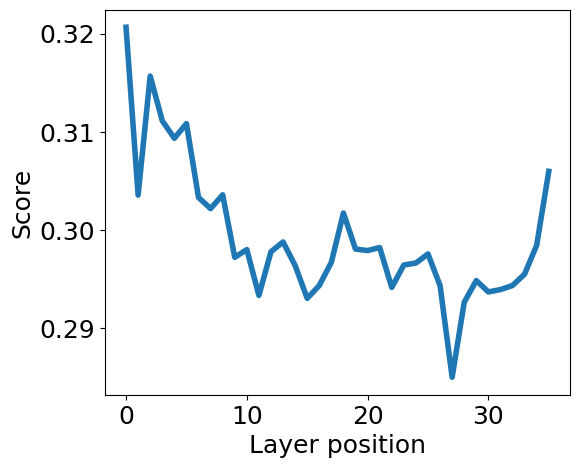

In [15]:
plt.rcParams.update({'font.size': 18})

fig, axs = plt.subplots(1,1,figsize=(6, 5))

array_ind = 3
neuroid_ind = 16
layer_scores_single_neuroid = []
for layer in range(36):
    neuroid_score_layer = layer_scores_per_neuroid_reordered_reshaped[layer,array_ind,neuroid_ind]
    layer_scores_single_neuroid.append(neuroid_score_layer)

# axs[subfig_ind].set_ylim(bottom=miny, top=maxy)
plt.plot(layer_scores_single_neuroid,linewidth=4)
#axs[subfig_ind].tick_params(axis='both', labelsize=10)
plt.xlabel('Layer position')
plt.ylabel('Score')


#figure(figsize=(8, 6), dpi=80)

plt.show()

#fig.savefig('/home/hadarla/Projects/brainscore-language-fork/results/Brainscore_t17_array55b-2-neuroid16.svg',bbox_inches='tight') #, bbox_inches='tight')

In [17]:
# layer_scores_ordered = []
# for layer in layer_names:
#     layer_scores_ordered.append(layer_scores.sel(layer=layer).data)

# layer_scores_std_ordered = []
# for layer in layer_names:
#     layer_scores_std_ordered.append(np.std(layer_scores.sel(layer=layer).raw.mean('neuroid')).data)

# print(layer_scores_ordered)
# print(layer_scores_std_ordered)